In [19]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [23]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    

Beginning Data Retrieval     
-----------------------------


In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | geraldton
Processing Record 2 of Set 13 | moron
Processing Record 3 of Set 13 | cherskiy
Processing Record 4 of Set 13 | kruisfontein
Processing Record 5 of Set 13 | longyearbyen
Processing Record 6 of Set 13 | cap-aux-meules
Processing Record 7 of Set 13 | bang saphan
Processing Record 8 of Set 13 | mwinilunga
Processing Record 9 of Set 13 | butaritari
Processing Record 10 of Set 13 | rio grande
Processing Record 11 of Set 13 | upernavik
Processing Record 12 of Set 13 | atar
Processing Record 13 of Set 13 | padang
Processing Record 14 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 13 | kapaa
Processing Record 16 of Set 13 | beloha
Processing Record 17 of Set 13 | klaksvik
Processing Record 18 of Set 13 | sept-iles
Processing Record 19 of Set 13 | punta arenas
Processing Record 20 of Set 13 | lebu
Processing Record 21 of Set 13 | rungata
City not found. Skipping...
Processing Record 22 of Set 13 | jamestown
Processing Recor

Processing Record 36 of Set 16 | kazalinsk
City not found. Skipping...
Processing Record 37 of Set 16 | alta floresta
Processing Record 38 of Set 16 | kavieng
Processing Record 39 of Set 16 | lorengau
Processing Record 40 of Set 16 | bengkulu
Processing Record 41 of Set 16 | vardo
Processing Record 42 of Set 16 | adrar
Processing Record 43 of Set 16 | haikou
Processing Record 44 of Set 16 | ostrovnoy
Processing Record 45 of Set 16 | avarua
Processing Record 46 of Set 16 | skelleftea
Processing Record 47 of Set 16 | hasaki
Processing Record 48 of Set 16 | bowen
Processing Record 49 of Set 16 | harper
Processing Record 50 of Set 16 | codrington
Processing Record 1 of Set 17 | jurm
Processing Record 2 of Set 17 | chokurdakh
Processing Record 3 of Set 17 | garden city
Processing Record 4 of Set 17 | pitea
Processing Record 5 of Set 17 | naze
Processing Record 6 of Set 17 | kavarna
Processing Record 7 of Set 17 | nishihara
Processing Record 8 of Set 17 | lichuan
Processing Record 9 of Set 1

City not found. Skipping...
Processing Record 22 of Set 20 | glendive
Processing Record 23 of Set 20 | oistins
Processing Record 24 of Set 20 | gurskoye
City not found. Skipping...
Processing Record 25 of Set 20 | kodiak
Processing Record 26 of Set 20 | pierre
Processing Record 27 of Set 20 | duluth
Processing Record 28 of Set 20 | toliary
City not found. Skipping...
Processing Record 29 of Set 20 | marzuq
Processing Record 30 of Set 20 | marcona
City not found. Skipping...
Processing Record 31 of Set 20 | verkh-usugli
Processing Record 32 of Set 20 | fairbanks
Processing Record 33 of Set 20 | green river
Processing Record 34 of Set 20 | tuatapere
Processing Record 35 of Set 20 | lavrentiya
Processing Record 36 of Set 20 | jumla
Processing Record 37 of Set 20 | bethel
Processing Record 38 of Set 20 | shar
Processing Record 39 of Set 20 | verkhnevilyuysk
Processing Record 40 of Set 20 | tacuarembo
Processing Record 41 of Set 20 | atikokan
Processing Record 42 of Set 20 | thinadhoo
Proce

Processing Record 9 of Set 24 | virginia beach
Processing Record 10 of Set 24 | kaihua
Processing Record 11 of Set 24 | manado
Processing Record 12 of Set 24 | geresk
City not found. Skipping...
Processing Record 13 of Set 24 | bridgetown
Processing Record 14 of Set 24 | mitsamiouli
Processing Record 15 of Set 24 | nara
Processing Record 16 of Set 24 | gorom-gorom
Processing Record 17 of Set 24 | sao paulo de olivenca
Processing Record 18 of Set 24 | mahajanga
Processing Record 19 of Set 24 | nyagan
Processing Record 20 of Set 24 | arlit
Processing Record 21 of Set 24 | olbia
Processing Record 22 of Set 24 | vanimo
Processing Record 23 of Set 24 | bargal
City not found. Skipping...
Processing Record 24 of Set 24 | tual
Processing Record 25 of Set 24 | turukhansk
Processing Record 26 of Set 24 | krasnoselkup
Processing Record 27 of Set 24 | devonport
Processing Record 28 of Set 24 | scottsbluff
Processing Record 29 of Set 24 | rockhampton
Processing Record 30 of Set 24 | porto novo
Proc

In [27]:
len(city_data)

554

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,65.12,67,100,9.22,AU,2021-06-15 04:09:10
1,Moron,-34.6534,-58.6198,49.75,81,26,5.01,AR,2021-06-15 04:09:11
2,Cherskiy,68.7500,161.3000,62.02,33,87,12.62,RU,2021-06-15 04:09:11
3,Kruisfontein,-34.0033,24.7314,50.88,78,76,4.34,ZA,2021-06-15 04:09:12
4,Longyearbyen,78.2186,15.6401,29.97,88,47,3.74,SJ,2021-06-15 04:09:12
...,...,...,...,...,...,...,...,...,...
549,Fenyi,27.8112,114.6681,94.80,51,100,5.44,CN,2021-06-15 04:13:23
550,Pahrump,36.2083,-115.9839,93.25,7,9,1.99,US,2021-06-15 04:13:23
551,Charlestown,-32.9500,151.6667,68.02,54,78,1.99,AU,2021-06-15 04:13:24
552,Erenhot,43.6475,111.9767,78.15,32,41,6.49,CN,2021-06-15 04:13:25


In [29]:
new_col_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Geraldton,AU,2021-06-15 04:09:10,-28.7667,114.6000,65.12,67,100,9.22
1,Moron,AR,2021-06-15 04:09:11,-34.6534,-58.6198,49.75,81,26,5.01
2,Cherskiy,RU,2021-06-15 04:09:11,68.7500,161.3000,62.02,33,87,12.62
3,Kruisfontein,ZA,2021-06-15 04:09:12,-34.0033,24.7314,50.88,78,76,4.34
4,Longyearbyen,SJ,2021-06-15 04:09:12,78.2186,15.6401,29.97,88,47,3.74
...,...,...,...,...,...,...,...,...,...
549,Fenyi,CN,2021-06-15 04:13:23,27.8112,114.6681,94.80,51,100,5.44
550,Pahrump,US,2021-06-15 04:13:23,36.2083,-115.9839,93.25,7,9,1.99
551,Charlestown,AU,2021-06-15 04:13:24,-32.9500,151.6667,68.02,54,78,1.99
552,Erenhot,CN,2021-06-15 04:13:25,43.6475,111.9767,78.15,32,41,6.49


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

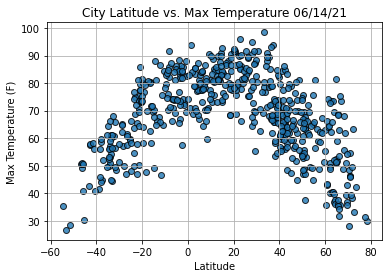

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

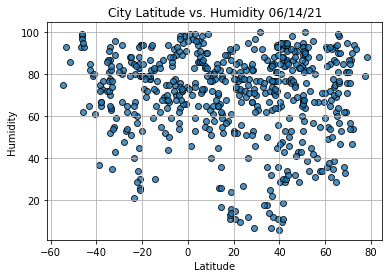

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

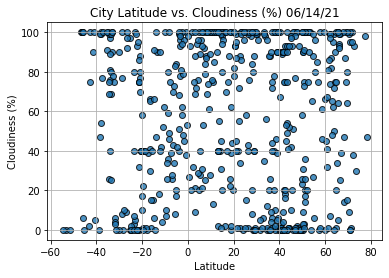

In [38]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

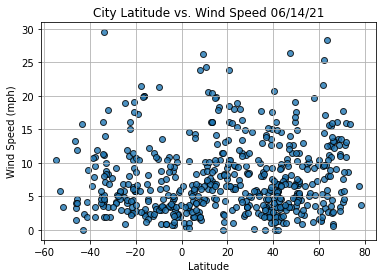

In [39]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Cherskiy,RU,2021-06-15 04:09:11,68.7500,161.3000,62.02,33,87,12.62
4,Longyearbyen,SJ,2021-06-15 04:09:12,78.2186,15.6401,29.97,88,47,3.74
5,Cap-Aux-Meules,CA,2021-06-15 04:09:13,47.3821,-61.8597,51.67,85,100,26.42
6,Bang Saphan,TH,2021-06-15 04:09:13,11.2126,99.5117,84.94,58,100,7.16
8,Butaritari,KI,2021-06-15 04:09:14,3.0707,172.7902,83.39,76,21,14.65
...,...,...,...,...,...,...,...,...,...
545,Kanker,IN,2021-06-15 04:13:21,20.2719,81.4931,78.08,78,100,9.82
549,Fenyi,CN,2021-06-15 04:13:23,27.8112,114.6681,94.80,51,100,5.44
550,Pahrump,US,2021-06-15 04:13:23,36.2083,-115.9839,93.25,7,9,1.99
552,Erenhot,CN,2021-06-15 04:13:25,43.6475,111.9767,78.15,32,41,6.49


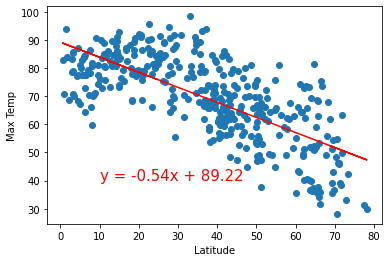

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

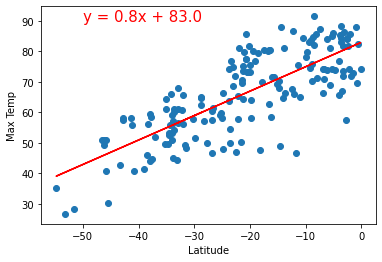

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

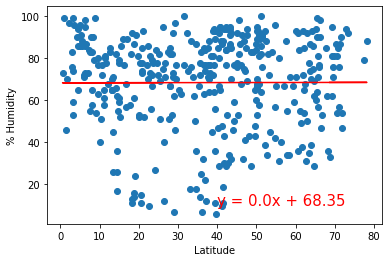

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

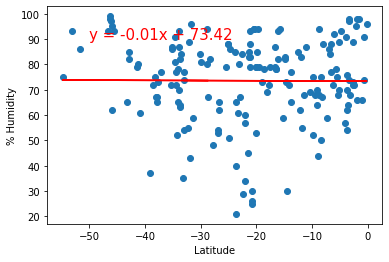

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

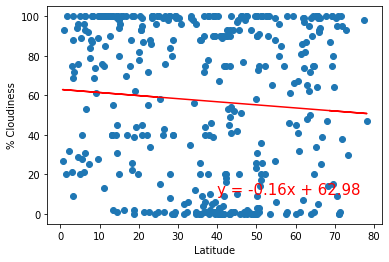

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

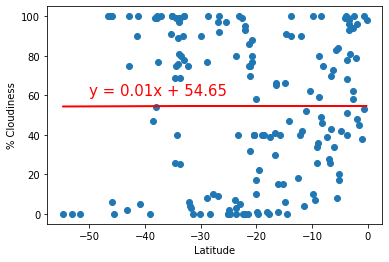

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

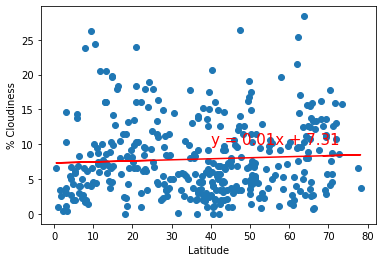

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Wind Speed', '% Cloudiness',(40,10))

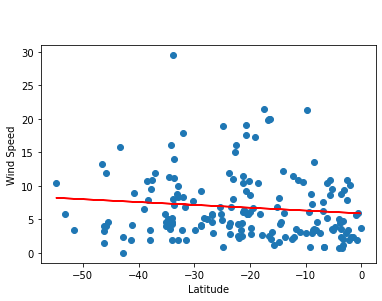

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))